## **Data Loading**

In [4]:
from PIL import Image
import os
from pathlib import Path
import shutil
import filecmp
import matplotlib.pyplot as plt


In [2]:
base_dir = Path("data")
target_dir = base_dir / "images"
target_dir.mkdir(exist_ok=True)

In [ ]:
existing_files = {f.name for f in target_dir.iterdir() if f.is_file()}

for folder in base_dir.iterdir():
    if folder.is_dir() and folder.name != "images":
        for image_file in folder.iterdir():
            if image_file.is_file():
                dest_file = target_dir / image_file.name
                if image_file.name not in existing_files:
                    shutil.move(str(image_file), str(dest_file))
                    existing_files.add(image_file.name)
                elif not filecmp.cmp(image_file, dest_file, shallow=False):
                    print(f"Conflict: {image_file} and {dest_file} differ.")


Conflict: data/data7/96367.jpg and data/images/96367.jpg differ.
Conflict: data/data5/82197.jpg and data/images/82197.jpg differ.
Conflict: data/data2/2462.jpg and data/images/2462.jpg differ.
Conflict: data/data3/40035.jpg and data/images/40035.jpg differ.
Conflict: data/data4/68070.jpg and data/images/68070.jpg differ.
Conflict: data/data4/54502.jpg and data/images/54502.jpg differ.


There are some conflicts but, at the moment, I don't care. As a result, we should have 100k images in the images directory.

In [3]:
image_dir = Path("data/images")

image_info = []

for img_file in image_dir.glob("*.*"):
    try:
        with Image.open(img_file) as img:
            size = img.size  # (width, height)
            file_size = img_file.stat().st_size  # in bytes
            image_info.append({
                "filename": img_file.name,
                "dimensions": size,
                "file_size_bytes": file_size
            })
    except Exception as e:
        print(f"Error opening {img_file.name}: {e}")

for info in image_info[:5]:  # adjust number to see more
    print(f"{info['filename']}: {info['dimensions']} px, {info['file_size_bytes']} bytes")

show_images = True
if show_images:
    for img_file in list(image_dir.glob("*.*"))[:3]:
        try:
            with Image.open(img_file) as img:
                img.show(title=img_file.name)
        except Exception as e:
            print(f"Could not open {img_file.name}: {e}")


Error opening 68070.jpg: cannot identify image file 'data/images/68070.jpg'
Error opening 82197.jpg: cannot identify image file 'data/images/82197.jpg'
9733.jpg: (1280, 720) px, 79879 bytes
14147.jpg: (1280, 720) px, 59027 bytes
86425.jpg: (1280, 720) px, 82845 bytes
52112.jpg: (1280, 720) px, 30305 bytes
89716.jpg: (1280, 720) px, 60558 bytes


All images have format (1280, 720).

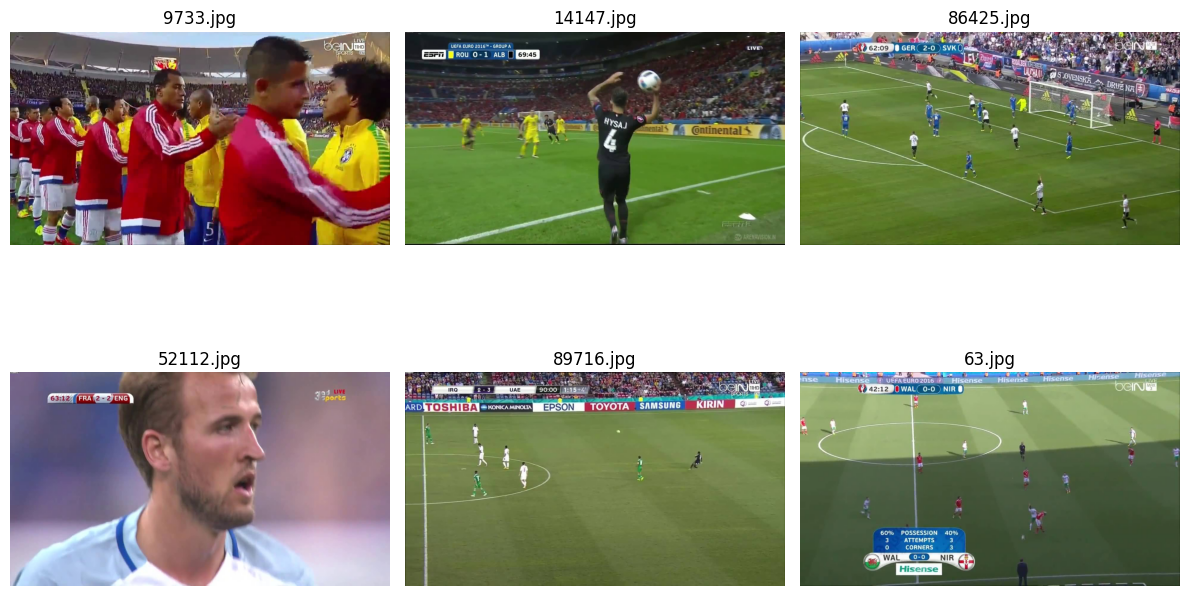

In [6]:
image_files = list(image_dir.glob("*.*"))[:6]  # Adjust number as needed

# Plot images
plt.figure(figsize=(12, 8))

for i, img_path in enumerate(image_files):
    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        plt.imshow(img)
        plt.title(img_path.name)
        plt.axis("off")
    except Exception as e:
        print(f"Failed to load {img_path.name}: {e}")

plt.tight_layout()
plt.show()